In [35]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import metrics

1. IMPORT DATASET

In [36]:
#a/ Load the data set
df = pd.read_excel("Data_AIL.xlsx")
df.head()

,e,no. video,Student ID,Full name,id,standardized dish,dish occurence (based on transcript),dish imply,start time,end time,...,sauce (based on transcript),venue,container,describe how to make it,viewer feeling of youtuber's style,viewer feeling of presented food,YouTuber feeling,location,foreigner,Unnamed: 24
0,1.0,51.0,NaN,NaN,5OzrpNCyXqs,snail vermicelli soup,bun oc,NaN,1:05,3:21,...,NaN,street restaurant,bowl,1.0,4.0,NaN,5.0,HN,1.0,NaN
1,2.0,51.0,NaN,NaN,5OzrpNCyXqs,vermicelli with fried tofu and shrimp paste,bun dau mam tom,NaN,3:32,6:10,...,"fish sauce, fermented shrimp paste, pepper, ch...",street restaurant,tray,1.0,4.0,NaN,4.0,HN,1.0,NaN
2,3.0,51.0,NaN,NaN,5OzrpNCyXqs,fried spring roll,spring roll,NaN,5:23,6:10,...,"fish sauce, sweet spicy garlic sauce",street restaurant,plate,0.0,5.0,NaN,5.0,HN,1.0,NaN
3,4.0,51.0,NaN,NaN,5OzrpNCyXqs,steamed rolled rice pancake,banh cuon,NaN,6:22,9:23,...,"garlic water, fried caramelized scallion, pepp...",street restaurant,plate,1.0,5.0,NaN,5.0,HN,1.0,NaN
4,5.0,51.0,NaN,NaN,5OzrpNCyXqs,shrimp cake,shrimp cake,NaN,9:42,11:55,...,"chili, sweet spicy sauce",street restaurant,plate,1.0,4.0,NaN,5.0,HN,1.0,NaN


In [37]:
new_feature = "container"
new_feature2 = "venue"

In [38]:
#b/ Select features
data = df[["start time","end time","Unnamed: 11","viewer feeling of youtuber's style ",new_feature, new_feature2]]

In [39]:
data= data.dropna(axis= 0)
data.describe()

,Unnamed: 11
count,3681.000000
mean,3.295844
std,2.817879
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,20.000000


In [40]:
#convert categorize collumns to numbers
le = LabelEncoder()
data[new_feature] = le.fit_transform(data[new_feature])
data[new_feature2] = le.fit_transform(data[new_feature2])

In [41]:
# convert start time and end time to seconds
import re
def __check_value_time(hours=0, minutes=0, seconds=0):
    # print('Time out: 'hours, minutes, seconds)
    if hours > 24:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Hour is out of range')

    if seconds > 60:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Second is out of range')

    if minutes > 60:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Minutes is out of range')

def process_time_str(time_str):
    time_data = re.findall('[0-9]?[0-9]', time_str)
    TIME_WITH_HOUR = 3
    TIME_WITH_MINUTES = 2
    TIME_WITH_SECONDS = 1
    MAX_SECONDS = 90060
    # print(time_data)
    if len(time_data) == TIME_WITH_HOUR:
        hours = int(time_data[0])
        minutes = int(time_data[1])
        seconds = int(time_data[2])

        __check_value_time(hours, seconds, minutes)

        return (hours*3600 + minutes*60 + seconds)
    if len(time_data) == TIME_WITH_MINUTES:
        minutes = int(time_data[0])
        seconds = int(time_data[1])

        __check_value_time(minutes=minutes, seconds=seconds)

        return (minutes*60 + seconds)
    if len(time_data) == TIME_WITH_SECONDS:
        seconds = int(time_data[0])

        __check_value_time(seconds=seconds)

        return seconds

In [42]:
index_data = list()
for str_time in data['start time']:
    if str_time[0].isdigit() and str_time[-1].isdigit():
        index_data.append(True)
    else:
        index_data.append(False)

data = data[index_data]

index_data = list()
for str_time in data['end time']:
    if str_time[0].isdigit() and str_time[-1].isdigit():
        index_data.append(True)
    else:
        index_data.append(False)
data = data[index_data]
df_time = list()

for start_time, end_time in zip(data['start time'], data['end time']):
    df_time.append((process_time_str(start_time), process_time_str(end_time)))

data[['start time', 'end time']] = df_time
data["viewer feeling of youtuber's style "] = data["viewer feeling of youtuber's style "].astype('int')


In [43]:
data['duration'] = data['end time']- data['start time']

In [44]:
data= data.loc[data['duration']>=0]
data = data.loc[data["viewer feeling of youtuber's style "]!=0]
data.head()

,start time,end time,Unnamed: 11,viewer feeling of youtuber's style,container,venue,duration
0,65,201,9,4,3,5,136
1,212,370,11,4,15,5,158
2,323,370,4,5,13,5,47
3,382,563,5,5,13,5,181
4,582,715,4,4,13,5,133


<AxesSubplot:title={'center':'Weight of class'}, ylabel='duration'>

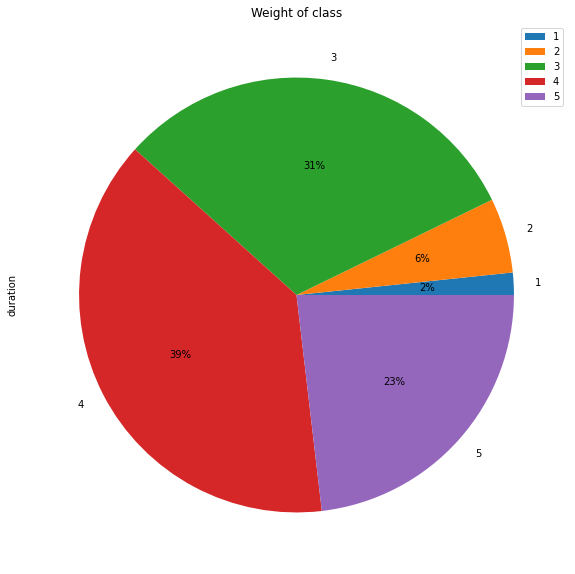

In [45]:
# Plotting the pie chart for above dataframe
data.groupby(["viewer feeling of youtuber's style "]).count().plot(kind='pie',y = "duration", autopct='%1.0f%%',figsize=(15,10), title= "Weight of class")

In [46]:


# Phân loại 
input_data = data[['duration', 'Unnamed: 11',new_feature,new_feature2]]
x = input_data.to_numpy()

In [51]:
input_data.head()

,duration,Unnamed: 11,container,venue
0,136,9,3,5
1,158,11,15,5
2,47,4,13,5
3,181,5,13,5
4,133,4,13,5


3. K_mean

In [47]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)

In [ ]:
# plot the 5 clusters
plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 0],  x[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 0],  x[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    x[y_km == 3, 0],  x[y_km == 3, 1],
    s=50, c='lightgray',
    marker='p', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    x[y_km == 4, 0],  x[y_km == 4, 1],
    s=50, c='pink',
    marker='h', edgecolor='black',
    label='cluster 5'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

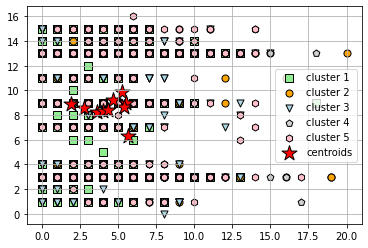

In [52]:
# plot the 5 clusters
plt.scatter(
    x[y_km == 0, 1], x[y_km == 0, 2],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 1],  x[y_km == 1, 2],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 1],  x[y_km == 2, 2],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    x[y_km == 3, 1],  x[y_km == 3, 2],
    s=50, c='lightgray',
    marker='p', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    x[y_km == 4, 1],  x[y_km == 4, 2],
    s=50, c='pink',
    marker='h', edgecolor='black',
    label='cluster 5'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 1], km.cluster_centers_[:, 2],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

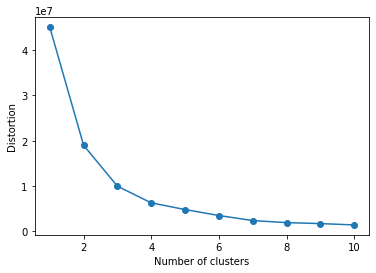

In [50]:

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()